In [2]:
# Read the February 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-08-power-survey-london.csv")

In [3]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-08-01 00:00:00,25.950,1.334,9.236,34.829,152.363,64.757,12.599,31.070,1.859,...,64,89,61,83,676,30,3787,496.210,0.131030,0.156711
1,2012-08-01 00:30:00,21.089,1.065,9.076,33.489,162.238,59.739,12.568,28.441,1.820,...,64,88,60,83,676,30,3788,510.246,0.134701,0.202315
2,2012-08-01 01:00:00,18.514,1.023,8.838,30.677,146.044,54.904,10.195,27.707,1.867,...,64,88,60,83,676,30,3788,464.065,0.122509,0.186825
3,2012-08-01 01:30:00,18.354,1.030,7.930,29.277,132.142,52.409,9.803,28.605,1.873,...,64,88,60,83,673,30,3785,430.514,0.113742,0.161242
4,2012-08-01 02:00:00,17.914,1.043,7.606,27.406,127.412,50.199,9.228,27.966,1.882,...,64,88,60,83,676,30,3788,408.798,0.107919,0.149178


In [6]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [7]:
# Create a dataframe representing energy consumption for August 4th 2012, the day
# of the Great Britain vs. S.Korea game.

df_GB_Korea_8_4 = df.loc[df['day']==4]
df_GB_Korea_8_4 = df_GB_Korea_8_4.set_index(df_GB_Korea_8_4["tstamp"])
df_GB_Korea_8_4.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-04 00:00:00,21.755,1.227,10.060,38.023,167.941,70.249,13.711,33.635,2.239,...,61,83,675,30,3796,521.343000,0.137340,0.160657,4,0:00
0:30,2012-08-04 00:30:00,22.167,0.945,10.646,32.971,173.415,63.826,12.888,31.007,2.338,...,60,83,676,30,3791,534.728999,0.141052,0.206938,4,0:30
1:00,2012-08-04 01:00:00,20.439,1.284,9.435,30.711,152.555,58.852,11.850,28.708,2.335,...,60,83,676,30,3792,478.735000,0.126249,0.182935,4,1:00
1:30,2012-08-04 01:30:00,20.035,0.968,9.631,28.977,134.079,57.812,10.573,26.448,2.405,...,60,83,676,30,3792,434.052000,0.114465,0.152829,4,1:30
2:00,2012-08-04 02:00:00,18.441,1.128,7.978,28.790,125.973,53.954,10.403,25.616,2.461,...,60,83,676,30,3792,414.107000,0.109205,0.136170,4,2:00


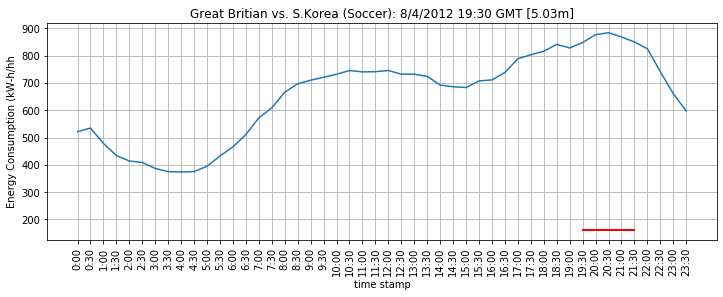

In [9]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_GB_Korea_8_4["tstamp"],df_GB_Korea_8_4["sigma"])
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. S.Korea (Soccer): 8/4/2012 19:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '21:30'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [10]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_GB_Korea_8_4["A_sigma"] + df_GB_Korea_8_4["B_sigma"] + df_GB_Korea_8_4["C_sigma"]
Acorn2  = df_GB_Korea_8_4["D_sigma"] + df_GB_Korea_8_4["E_sigma"]
Acorn3  = df_GB_Korea_8_4["F_sigma"] + df_GB_Korea_8_4["G_sigma"] + df_GB_Korea_8_4["H_sigma"] \
                                           + df_GB_Korea_8_4["I_sigma"] + df_GB_Korea_8_4["J_sigma"]                                            
Acorn4  = df_GB_Korea_8_4["K_sigma"] + df_GB_Korea_8_4["L_sigma"] + df_GB_Korea_8_4["M_sigma"] \
                                           + df_GB_Korea_8_4["N_sigma"]
Acorn5  = df_GB_Korea_8_4["O_sigma"] + df_GB_Korea_8_4["P_sigma"] + df_GB_Korea_8_4["Q_sigma"]

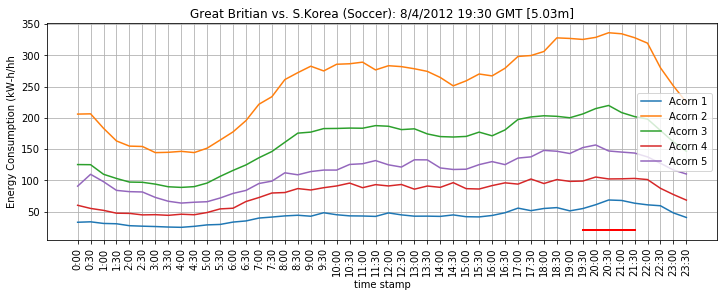

In [11]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. S.Korea (Soccer): 8/4/2012 19:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '21:30'], [20, 20], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [12]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

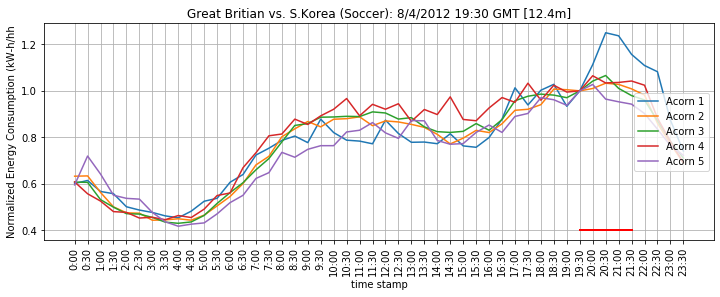

In [13]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Korea_8_4["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. S.Korea (Soccer): 8/4/2012 19:30 GMT [12.4m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '21:30'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [14]:
####NEW GAME######

# Create a dataframe representing energy consumption for August 1st 2012, the day
# of the Great Britain vs. Uruguay game.

df_GB_Uruguay_8_1 = df.loc[df['day']==1]
df_GB_Uruguay_8_1 = df_GB_Uruguay_8_1.set_index(df_GB_Uruguay_8_1["tstamp"])
df_GB_Uruguay_8_1.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-01 00:00:00,25.950,1.334,9.236,34.829,152.363,64.757,12.599,31.070,1.859,...,61,83,676,30,3787,496.210,0.131030,0.156711,1,0:00
0:30,2012-08-01 00:30:00,21.089,1.065,9.076,33.489,162.238,59.739,12.568,28.441,1.820,...,60,83,676,30,3788,510.246,0.134701,0.202315,1,0:30
1:00,2012-08-01 01:00:00,18.514,1.023,8.838,30.677,146.044,54.904,10.195,27.707,1.867,...,60,83,676,30,3788,464.065,0.122509,0.186825,1,1:00
1:30,2012-08-01 01:30:00,18.354,1.030,7.930,29.277,132.142,52.409,9.803,28.605,1.873,...,60,83,673,30,3785,430.514,0.113742,0.161242,1,1:30
2:00,2012-08-01 02:00:00,17.914,1.043,7.606,27.406,127.412,50.199,9.228,27.966,1.882,...,60,83,676,30,3788,408.798,0.107919,0.149178,1,2:00


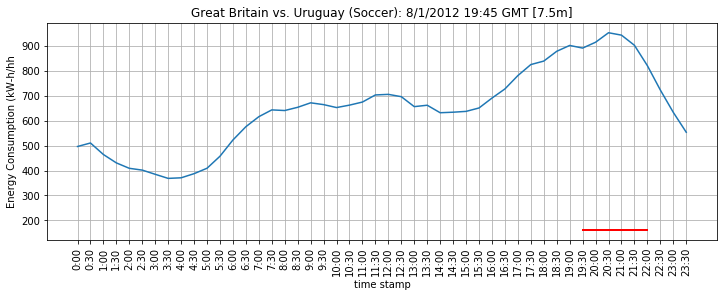

In [20]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the Great Britain vs. Uruguay game, which took place on day 4
# between 19:45 and 21:45 (approx).

dfevent = df_GB_Uruguay_8_1
title   = "Great Britain vs. Uruguay (Soccer): 8/1/2012 19:45 GMT [7.5m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [17]:
# Create a dataframe representing energy consumption for August 1st 2012, the day
# of the Great Britian vs. Uruguay game.

df_GB_Uruguay_8_1 = df.loc[df['day']==1]
df_GB_Uruguay_8_1 = df_GB_Uruguay_8_1.set_index(df_GB_Uruguay_8_1["tstamp"])
df_GB_Uruguay_8_1.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-01 00:00:00,25.950,1.334,9.236,34.829,152.363,64.757,12.599,31.070,1.859,...,61,83,676,30,3787,496.210,0.131030,0.156711,1,0:00
0:30,2012-08-01 00:30:00,21.089,1.065,9.076,33.489,162.238,59.739,12.568,28.441,1.820,...,60,83,676,30,3788,510.246,0.134701,0.202315,1,0:30
1:00,2012-08-01 01:00:00,18.514,1.023,8.838,30.677,146.044,54.904,10.195,27.707,1.867,...,60,83,676,30,3788,464.065,0.122509,0.186825,1,1:00
1:30,2012-08-01 01:30:00,18.354,1.030,7.930,29.277,132.142,52.409,9.803,28.605,1.873,...,60,83,673,30,3785,430.514,0.113742,0.161242,1,1:30
2:00,2012-08-01 02:00:00,17.914,1.043,7.606,27.406,127.412,50.199,9.228,27.966,1.882,...,60,83,676,30,3788,408.798,0.107919,0.149178,1,2:00


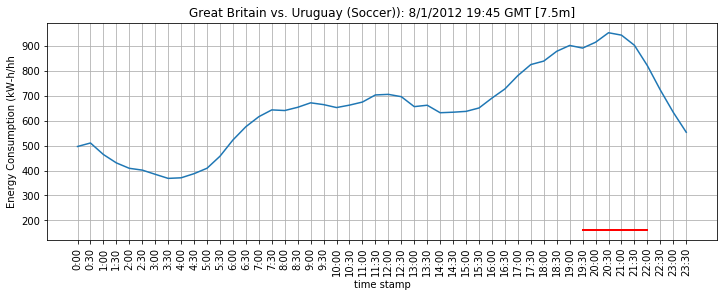

In [21]:
# Enter details for the Great Britain vs Uruguay game, which took place on day 1
# between 19:45 and 21:45 (approx).

dfevent = df_GB_Uruguay_8_1
title   = "Great Britain vs. Uruguay (Soccer)): 8/1/2012 19:45 GMT [7.5m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [24]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_GB_Uruguay_8_1["A_sigma"] + df_GB_Uruguay_8_1["B_sigma"] + df_GB_Uruguay_8_1["C_sigma"]
Acorn2  = df_GB_Uruguay_8_1["D_sigma"] + df_GB_Uruguay_8_1["E_sigma"]
Acorn3  = df_GB_Uruguay_8_1["F_sigma"] + df_GB_Uruguay_8_1["G_sigma"] + df_GB_Uruguay_8_1["H_sigma"] \
                                           + df_GB_Uruguay_8_1["I_sigma"] + df_GB_Uruguay_8_1["J_sigma"]                                            
Acorn4  = df_GB_Uruguay_8_1["K_sigma"] + df_GB_Uruguay_8_1["L_sigma"] + df_GB_Uruguay_8_1["M_sigma"] \
                                           + df_GB_Uruguay_8_1["N_sigma"]
Acorn5  = df_GB_Uruguay_8_1["O_sigma"] + df_GB_Uruguay_8_1["P_sigma"] + df_GB_Uruguay_8_1["Q_sigma"]

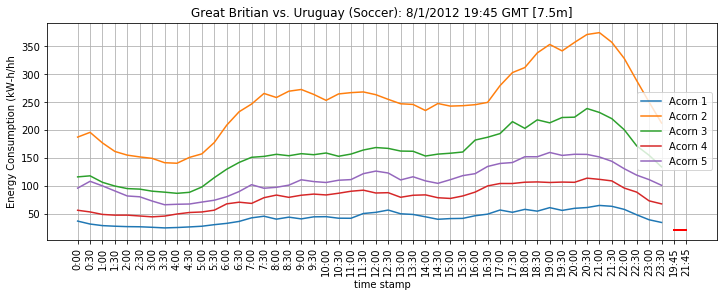

In [25]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. Uruguay (Soccer): 8/1/2012 19:45 GMT [7.5m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:45', '21:45'], [20, 20], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [26]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

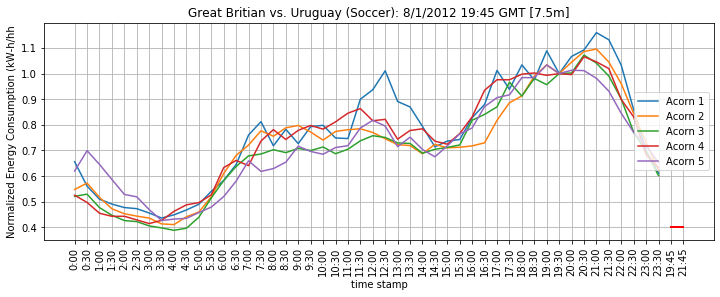

In [27]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Uruguay_8_1["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. Uruguay (Soccer): 8/1/2012 19:45 GMT [7.5m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:45', '21:45'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [28]:
#### NEW GAME####
# Create a dataframe representing energy consumption for July 29th 2012, the day
# of the Great Britain vs. UAE game.

df_GB_UAE_7_29 = df.loc[df['day']==29]
df_GB_UAE_7_29 = df_GB_UAE_7_29.set_index(df_GB_UAE_7_29["tstamp"])
df_GB_UAE_7_29.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-29 00:00:00,20.743,1.232,9.451,36.531,142.581,66.407,11.814,33.523,2.084,...,60,83,677,30,3795,481.589000,0.126901,0.152334,29,0:00
0:30,2012-08-29 00:30:00,19.389,1.111,9.475,32.866,156.108,60.185,10.533,31.431,1.905,...,60,83,678,30,3795,499.086001,0.131511,0.211096,29,0:30
1:00,2012-08-29 01:00:00,18.718,0.965,8.972,29.225,144.265,56.533,9.928,30.067,1.960,...,60,83,678,30,3795,458.692999,0.120868,0.196970,29,1:00
1:30,2012-08-29 01:30:00,17.829,0.996,7.577,26.924,132.244,51.537,10.090,27.525,1.807,...,60,83,678,30,3795,417.372000,0.109979,0.160335,29,1:30
2:00,2012-08-29 02:00:00,18.406,0.936,7.740,26.918,118.244,47.396,9.567,27.541,1.848,...,60,83,678,30,3795,384.001000,0.101186,0.132803,29,2:00


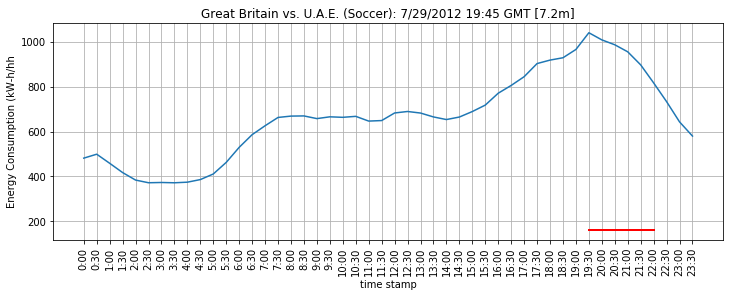

In [29]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the Great Britain vs. Uruguay game, which took place on day 4
# between 19:45 and 21:45 (approx).

dfevent = df_GB_UAE_7_29
title   = "Great Britain vs. U.A.E. (Soccer): 7/29/2012 19:45 GMT [7.2m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

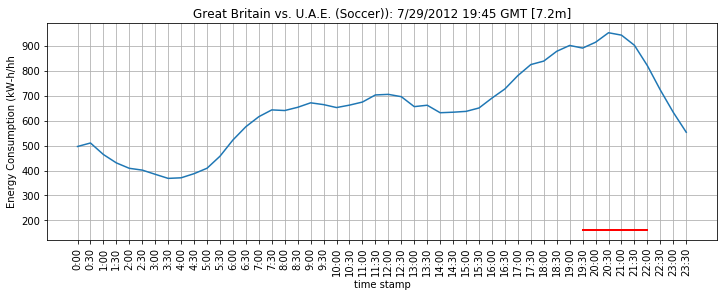

In [30]:
# Enter details for the Great Britain vs Uruguay game, which took place on day 1
# between 19:45 and 21:45 (approx).

dfevent = df_GB_Uruguay_8_1
title   = "Great Britain vs. U.A.E. (Soccer)): 7/29/2012 19:45 GMT [7.2m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [35]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_GB_UAE_7_29["A_sigma"] + df_GB_UAE_7_29["B_sigma"] + df_GB_UAE_7_29["C_sigma"]
Acorn2  = df_GB_UAE_7_29["D_sigma"] + df_GB_UAE_7_29["E_sigma"]
Acorn3  = df_GB_UAE_7_29["F_sigma"] + df_GB_UAE_7_29["G_sigma"] + df_GB_UAE_7_29["H_sigma"] \
                                           + df_GB_UAE_7_29["I_sigma"] + df_GB_UAE_7_29["J_sigma"]                                            
Acorn4  = df_GB_UAE_7_29["K_sigma"] + df_GB_UAE_7_29["L_sigma"] + df_GB_UAE_7_29["M_sigma"] \
                                           + df_GB_UAE_7_29["N_sigma"]
Acorn5  = df_GB_UAE_7_29["O_sigma"] + df_GB_UAE_7_29["P_sigma"] + df_GB_UAE_7_29["Q_sigma"]

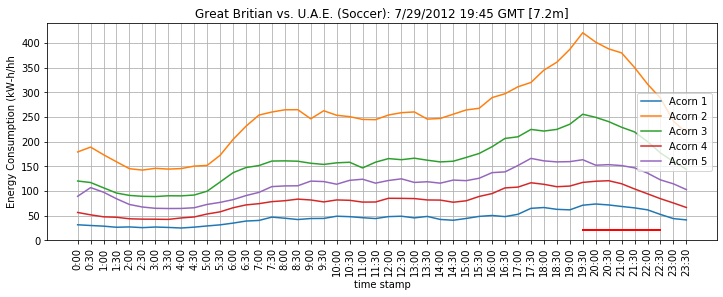

In [36]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. U.A.E. (Soccer): 7/29/2012 19:45 GMT [7.2m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '22:30'], [20, 20], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [39]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

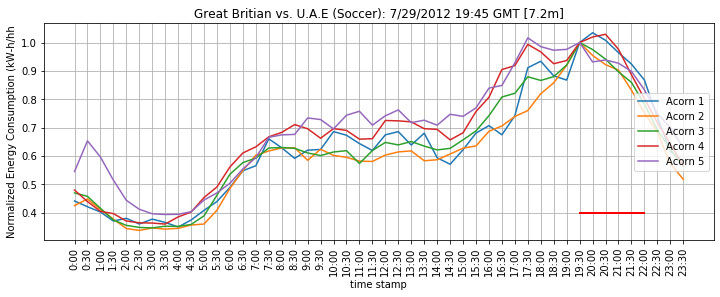

In [40]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_UAE_7_29["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. U.A.E (Soccer): 7/29/2012 19:45 GMT [7.2m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '22:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [41]:
#####NEW GAME#####
# Create a dataframe representing energy consumption for July 26th 2012, the day
# of the Great Britain vs. Senegal game.

df_GB_Senegal_7_26 = df.loc[df['day']==26]
df_GB_Senegal_7_26 = df_GB_Senegal_7_26.set_index(df_GB_Senegal_7_26["tstamp"])
df_GB_Senegal_7_26.head(5)


,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-26 00:00:00,20.557,1.410,9.242,37.317,153.886,71.500,12.316,34.671,1.969,...,60,83,677,30,3792,514.451,0.135667,0.177835,26,0:00
0:30,2012-08-26 00:30:00,18.683,1.202,8.225,33.771,158.420,63.228,11.314,32.221,2.148,...,60,83,676,30,3795,514.634,0.135608,0.206104,26,0:30
1:00,2012-08-26 01:00:00,17.488,1.046,8.360,30.145,144.924,60.594,11.016,29.870,2.026,...,60,83,676,30,3796,468.967,0.123542,0.185422,26,1:00
1:30,2012-08-26 01:30:00,16.680,1.167,7.668,29.289,130.851,58.003,10.976,30.260,1.851,...,60,83,676,30,3796,431.236,0.113603,0.154947,26,1:30
2:00,2012-08-26 02:00:00,16.497,0.947,7.693,27.701,122.116,51.970,9.910,27.684,2.042,...,60,83,676,30,3796,396.183,0.104369,0.129389,26,2:00


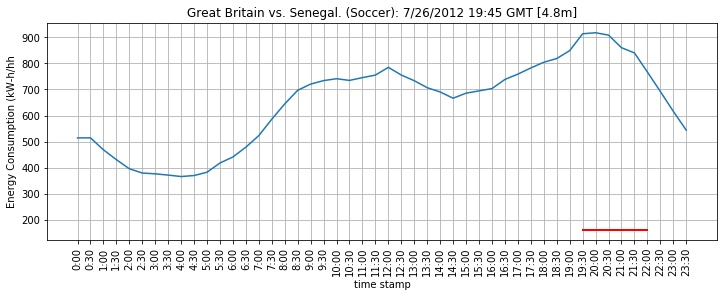

In [42]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the Great Britain vs. Senegal game, which took place on day 26
# between 19:45 and 21:45 (approx).

dfevent = df_GB_Senegal_7_26
title   = "Great Britain vs. Senegal. (Soccer): 7/26/2012 19:45 GMT [4.8m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

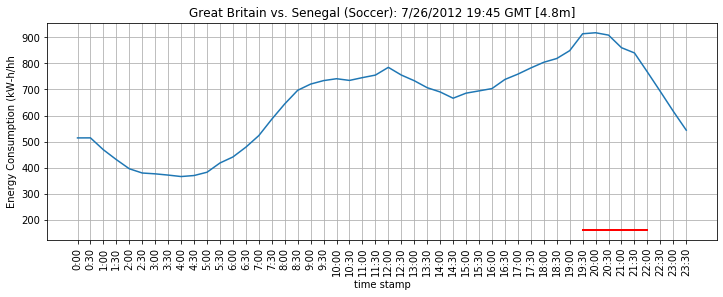

In [43]:
# Enter details for the Great Britain vs Senegal game, which took place on day 26
# between 19:45 and 21:45 (approx).

dfevent = df_GB_Senegal_7_26
title   = "Great Britain vs. Senegal (Soccer): 7/26/2012 19:45 GMT [4.8m]"
tsb     = '19:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [44]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_GB_Senegal_7_26["A_sigma"] + df_GB_Senegal_7_26["B_sigma"] + df_GB_Senegal_7_26["C_sigma"]
Acorn2  = df_GB_Senegal_7_26["D_sigma"] + df_GB_Senegal_7_26["E_sigma"]
Acorn3  = df_GB_Senegal_7_26["F_sigma"] + df_GB_Senegal_7_26["G_sigma"] + df_GB_Senegal_7_26["H_sigma"] \
                                           + df_GB_Senegal_7_26["I_sigma"] + df_GB_Senegal_7_26["J_sigma"]                                            
Acorn4  = df_GB_Senegal_7_26["K_sigma"] + df_GB_Senegal_7_26["L_sigma"] + df_GB_Senegal_7_26["M_sigma"] \
                                           + df_GB_Senegal_7_26["N_sigma"]
Acorn5  = df_GB_Senegal_7_26["O_sigma"] + df_GB_Senegal_7_26["P_sigma"] + df_GB_Senegal_7_26["Q_sigma"]

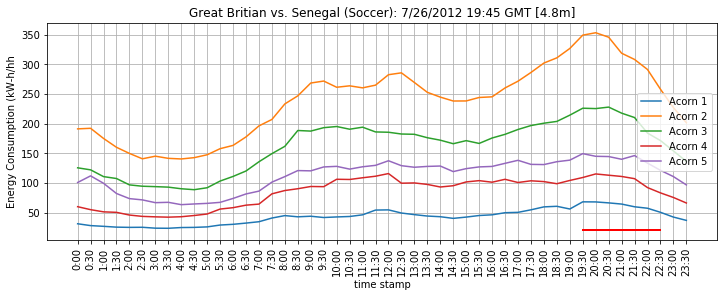

In [45]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. Senegal (Soccer): 7/26/2012 19:45 GMT [4.8m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '22:30'], [20, 20], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [46]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

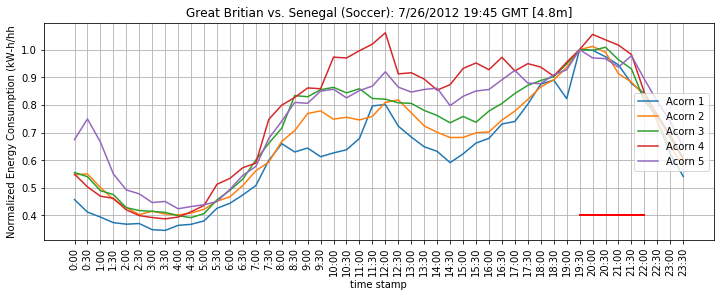

In [47]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_GB_Senegal_7_26["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("Great Britian vs. Senegal (Soccer): 7/26/2012 19:45 GMT [4.8m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:30', '22:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()